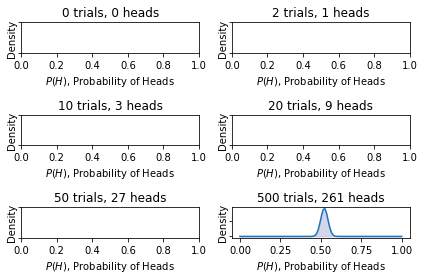

In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 22 15:51:59 2018

@author: YoungFreeesh
"""

# beta_binomial.py
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

if __name__ == "__main__":
    # Create a list of the number of coin tosses ("Bernoulli trials") 
    number_of_trials = [0, 2, 10, 20, 50, 500]
    
    # Conduct 500 coin tosses and output into a list of 0s and 1s 
    # where 0 represents a tail and 1 represents a head
    data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
    
    # Discretise the x-axis into 100 separate plotting points
    x = np.linspace(0, 1, 100)
    
    # Loops over the number_of_trials list to continually add
    # more coin toss data. For each new set of data, we update
    # our (current) prior belief to be a new posterior. This is
    # carried out using what is known as the Beta-Binomial model. # For the time being, we won’t worry about this too much.
    for i, N in enumerate(number_of_trials):
        # Accumulate the total number of heads for this 
        # particular Bayesian update
        heads = data[:N].sum()
        # Create an axes subplot for each update
        ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
        ax.set_title("%s trials, %s heads" % (N, heads))
        # Add labels to both axes and hide labels on y-axis
        plt.xlabel("$P(H)$, Probability of Heads") 
        plt.ylabel("Density")
        if i == 0:
            plt.ylim([0.0, 2.0]) 
        plt.setp(ax.get_yticklabels(), visible=False)
    # Create and plot a Beta distribution to represent the
    # posterior belief in fairness of the coin.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads)) 
    plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)
    # Expand plot to cover full width/height and show it
    plt.tight_layout()
    plt.show()
    
    